In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import norm

In [ ]:

df = walmart_data = pd.read_csv('/content/drive/MyDrive/Wallmart_dataset_2/walmart_data_new.csv')

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### QUESTION: ***1***

Defining Problem Statement and Analyzing basic metrics (10 Points)

1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

2. Non-Graphical Analysis: Value counts and unique attributes ​

3. Visual Analysis - Univariate & Bivariate
    * For continuous variable(s): Distplot, countplot, histogram for univariate analysis
    
    * For categorical variable(s): Boxplot

    *For correlation: Heatmaps, Pairplots


### 1. Problem Statement

Identify patterns and insights in customer purchase behavior during Black Friday at Walmart to optimize future marketing strategies, product placements, and promotions to increase sales and customer satisfaction.

**Basic Metrics Analysis:**


1. Average Purchase Amount: Overall and categorized by different features like gender, age, occupation, city category, and marital status.

2. Total Sales Volume: Total revenue generated, which can be broken down into categories based on product categories, age groups, gender, etc.

3. Customer Demographics:

    * Gender Distribution: Proportion of male vs. female shoppers.
    * Age Distribution: Breakdown of customers into various age groups.
    * Marital Status: Proportion of married vs. unmarried customers.


4. Product Popularity:

    * Best-selling Product Categories: Identifying which product categories are most popular.
    * Products with Highest Sales: Products that generate the highest revenue.
City Category Analysis: Sales distribution across different city categories (A, B, C).

5. Customer Loyalty:

    * Frequency of purchases by individual customers.
    * Analysis of repeat customers vs. new customers.



In [ ]:

# Average Purchase Amount
average_purchase_amount = walmart_data['Purchase'].mean()

# Total Sales Volume
total_sales_volume = walmart_data['Purchase'].sum()

# Gender Distribution
gender_distribution = walmart_data['Gender'].value_counts(normalize=True) * 100

# Age Distribution
age_distribution = walmart_data['Age'].value_counts(normalize=True) * 100

# Marital Status Distribution
marital_status_distribution = walmart_data['Marital_Status'].value_counts(normalize=True) * 100

# Product Popularity
top_product_categories = walmart_data.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False).head()
top_selling_products = walmart_data.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head()

# City Category Analysis
sales_by_city = walmart_data.groupby('City_Category')['Purchase'].sum()

# Customer Loyalty (Purchase Frequency)
purchase_frequency = walmart_data['User_ID'].value_counts().head()

# Printing the insights
print(f"Average Purchase Amount: ${average_purchase_amount:.2f}")
print(f"Total Sales Volume: ${total_sales_volume}")
print("Gender Distribution (%):")
print(gender_distribution)
print("Age Distribution (%):")
print(age_distribution)
print("Marital Status Distribution (%):")
print(marital_status_distribution)
print("Top Product Categories (by sales volume):")
print(top_product_categories)
print("Top Selling Products (by sales volume):")
print(top_selling_products)
print("Sales by City Category:")
print(sales_by_city)
print("Top 5 Customers by Purchase Frequency:")
print(purchase_frequency)


Average Purchase Amount: $9263.97
Total Sales Volume: $5095812742
Gender Distribution (%):
M    75.310507
F    24.689493
Name: Gender, dtype: float64
Age Distribution (%):
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64
Marital Status Distribution (%):
0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64
Top Product Categories (by sales volume):
Product_Category
1    1910013754
5     941835229
8     854318799
6     324150302
2     268516186
Name: Purchase, dtype: int64
Top Selling Products (by sales volume):
Product_ID
P00025442    27995166
P00110742    26722309
P00255842    25168963
P00059442    24338343
P00184942    24334887
Name: Purchase, dtype: int64
Sales by City Category:
City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64
Top 5 Customers by Purchase Frequency:
1001680    1026
1004277     979
1001941     898
1001181  

## Shape of the data

In [ ]:
df.shape

(550068, 10)

## Top 5 rows

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Data type of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


# Converting into Categorical Attribute

Gender
Age                         
Occupation
City_Category
Marital_Status
Product_Category


In [ ]:
categorical_attributes = ['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category','Stay_In_Current_City_Years']
for col in categorical_attributes:
  df[col] = df[col].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


### Q 1.2 Non-Graphical Analysis : Value Counts and Unique attributes

In [ ]:
def analyze_column(column_name):
  unique_values = df[column_name].unique()
  value_counts = df[column_name].value_counts()
  print(f"{column_name}:\nUnique Values: {unique_values}\nValue Count: \n{value_counts}\n")

In [ ]:
columns_to_analyze = ['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
for column in columns_to_analyze:
  analyze_column(column)

User_ID:
Unique Values: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Value Count: 
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

Product_ID:
Unique Values: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Value Count: 
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

Gender:
Unique Values: ['F', 'M']
Categories (2, object): ['F', 'M']
Value Count: 
M    414259
F    135809
Name: Gender, dtype: int64

Age:
Unique Values: ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
Value Count: 
26-35    2

## 1.3 Visual Analysis - Univariate & Bivariate
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot
For correlation: Heatmaps, Pairplots

UNIVARIATE ANALYSIS

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


**HISTOGRAM**

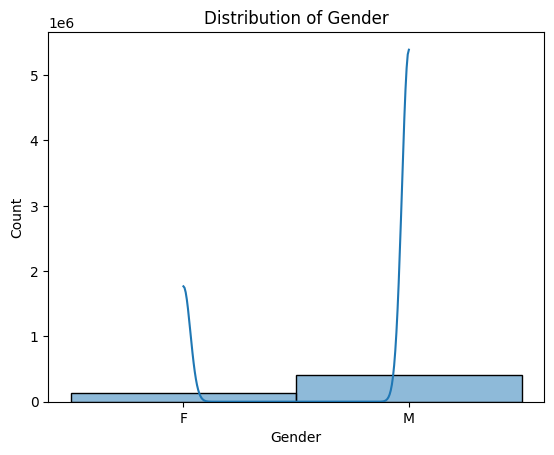

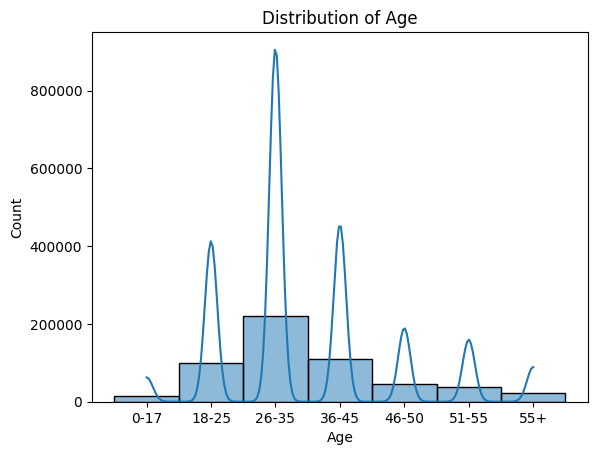

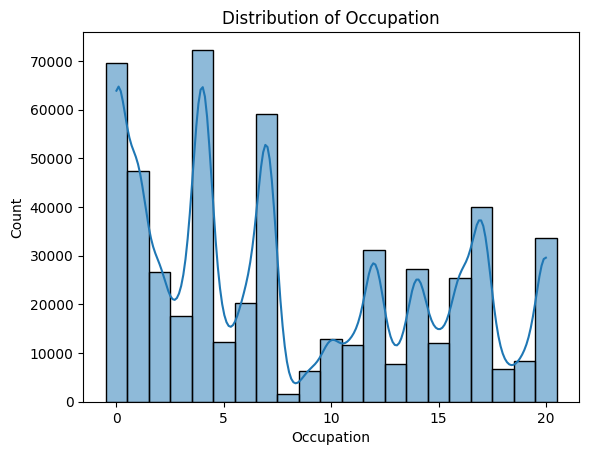

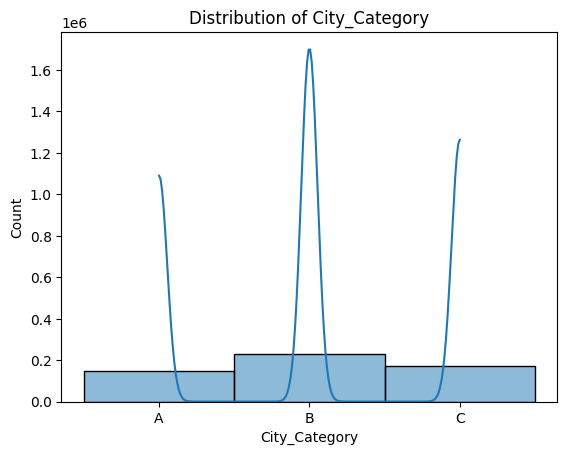

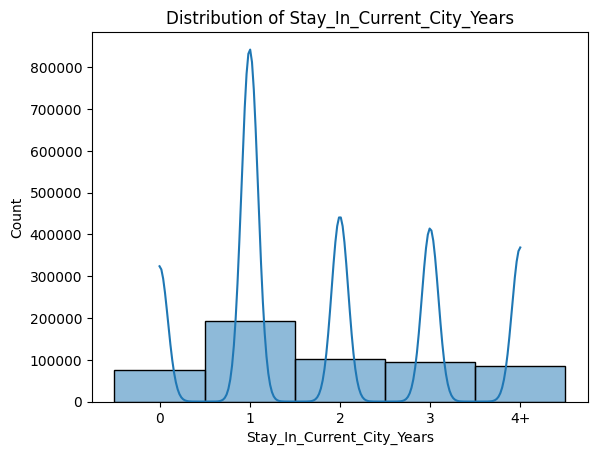

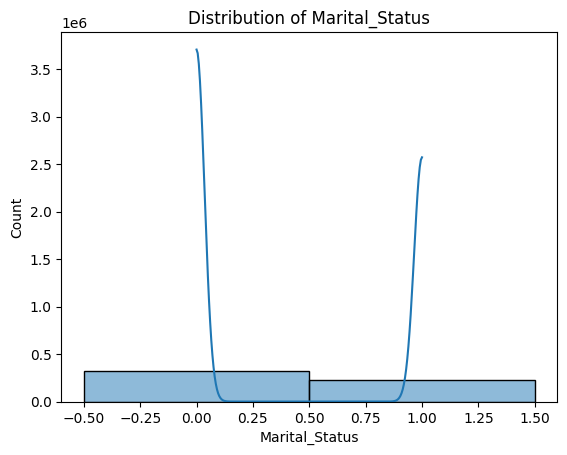

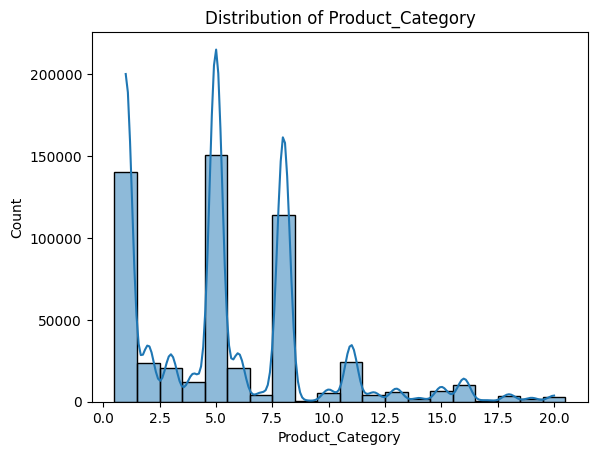

In [ ]:
category_vars = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
for var in category_vars:
  sns.histplot(df[var], kde = True)
  plt.title(f'Distribution of {var}')
  plt.show()


DISTPLOT FOR CONTINUOUS VARIABLE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


<ipython-input-21-3e81124c56b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde = True)


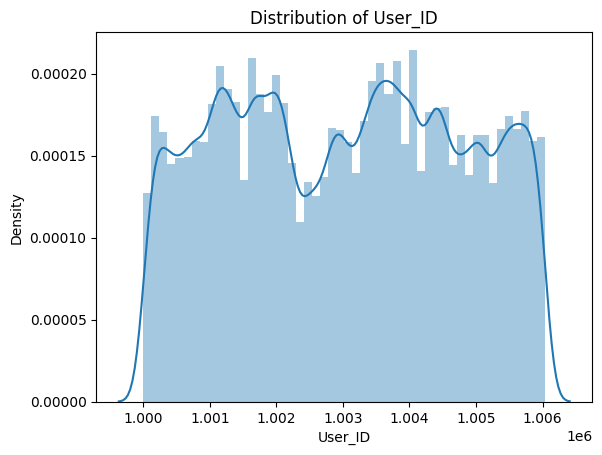

<ipython-input-21-3e81124c56b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde = True)


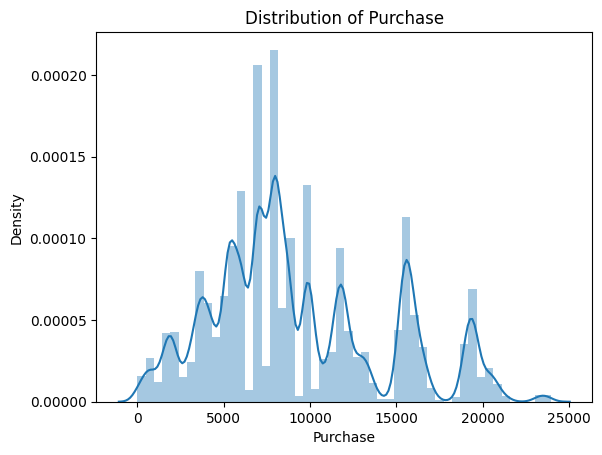

In [ ]:
continuous_vars = ['User_ID','Purchase']
for var in continuous_vars:
  sns.distplot(df[var], kde = True)
  plt.title(f'Distribution of {var}')
  plt.show()


For Continuous Variable

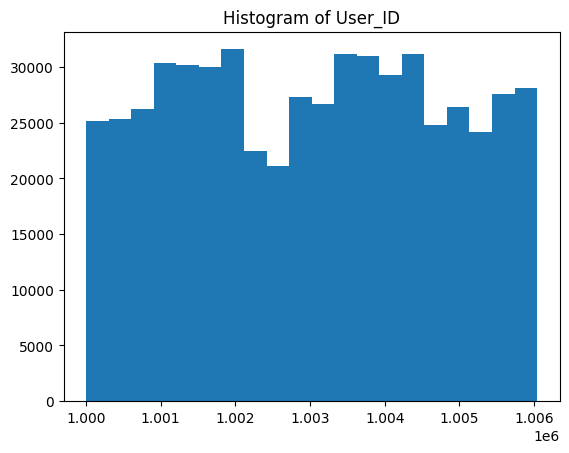

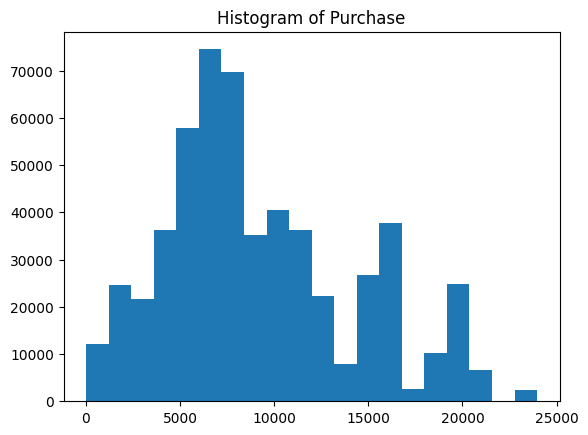

In [ ]:
continuous_vars = ['User_ID','Purchase']
for var in continuous_vars:
  plt.hist(df[var], bins = 20)
  plt.title(f'Histogram of {var}')
  plt.show()

# Bivariate Analysis

3.2.1: Bivariate Analysis for continuous vs categorical data

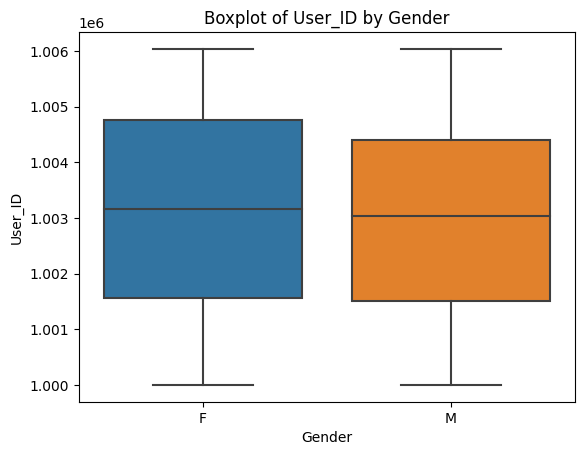

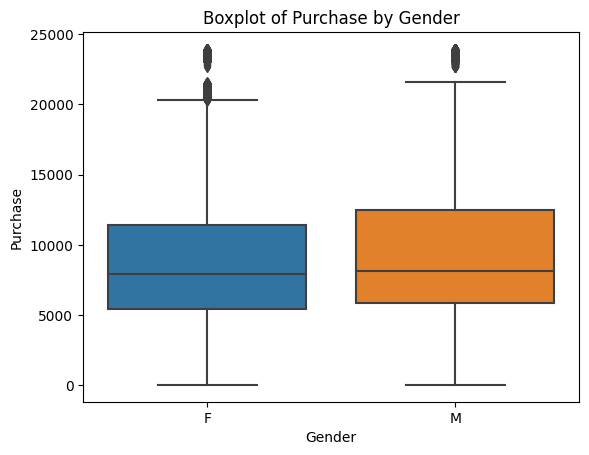

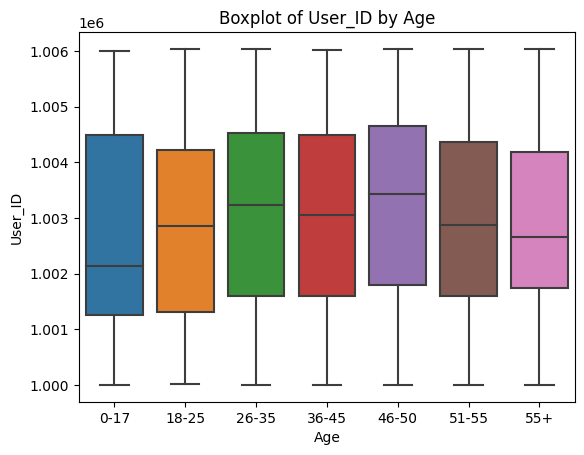

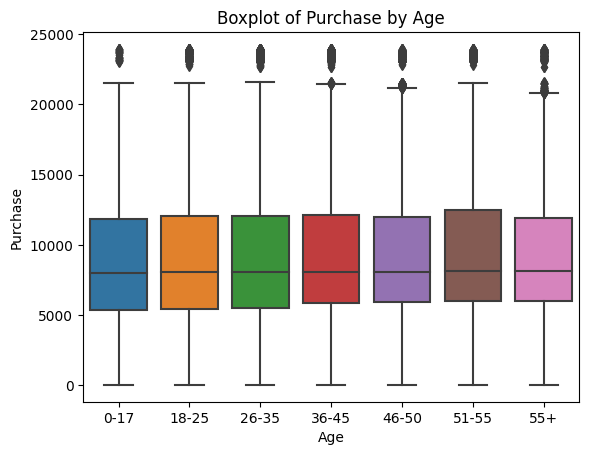

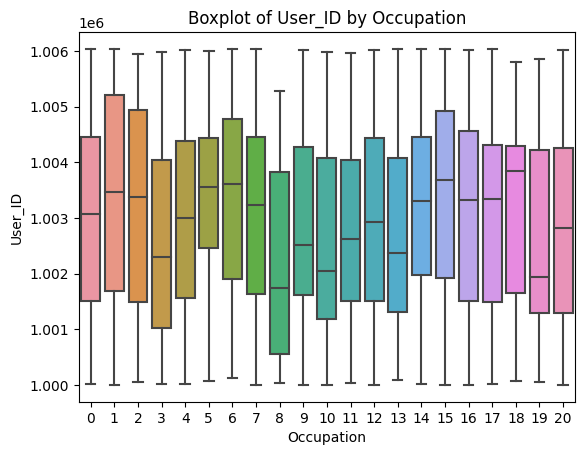

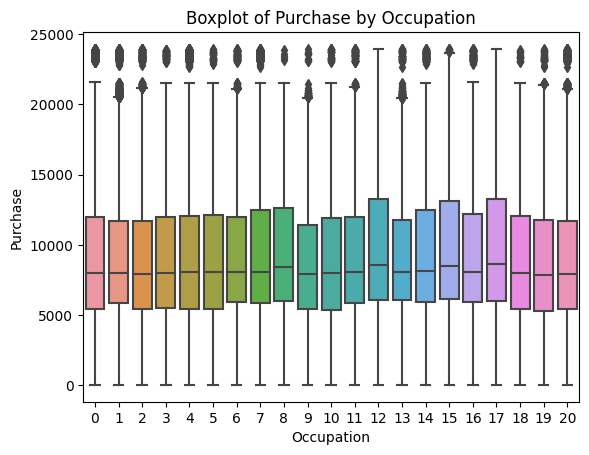

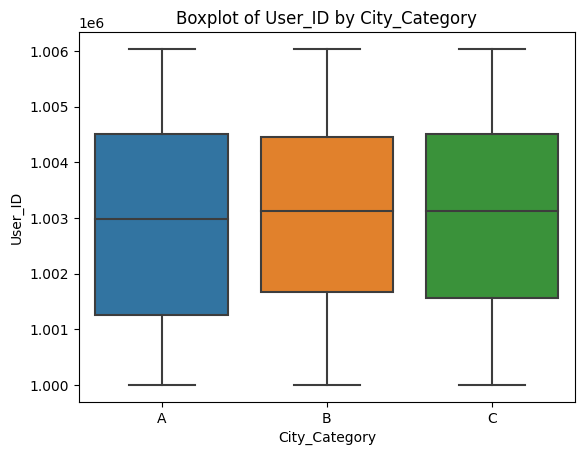

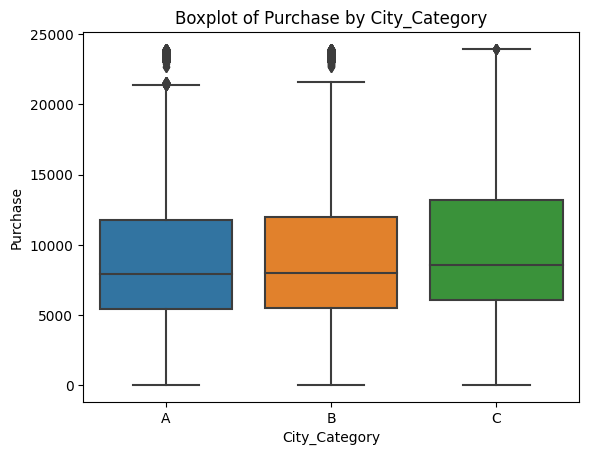

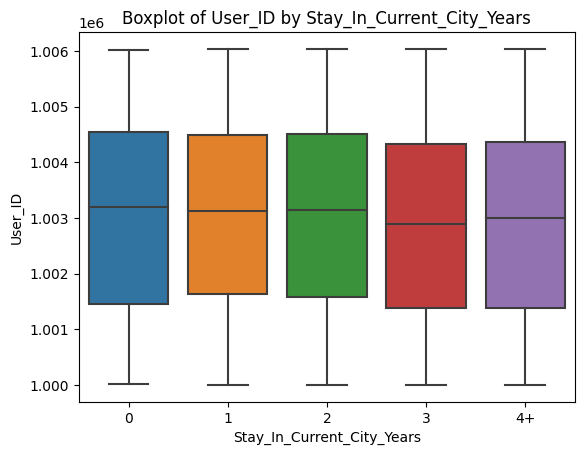

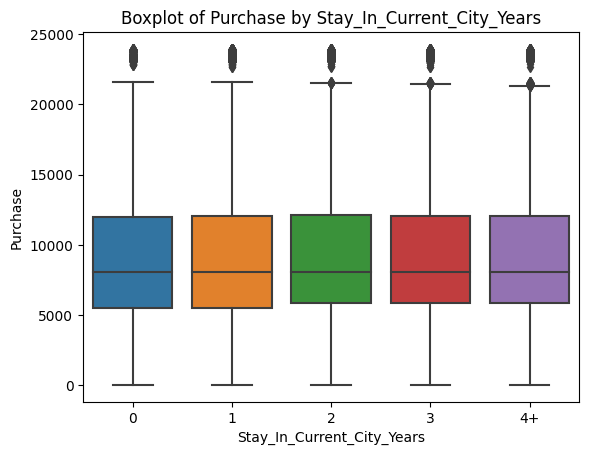

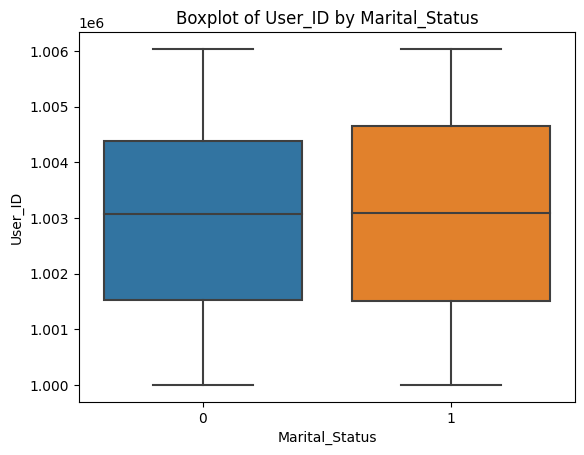

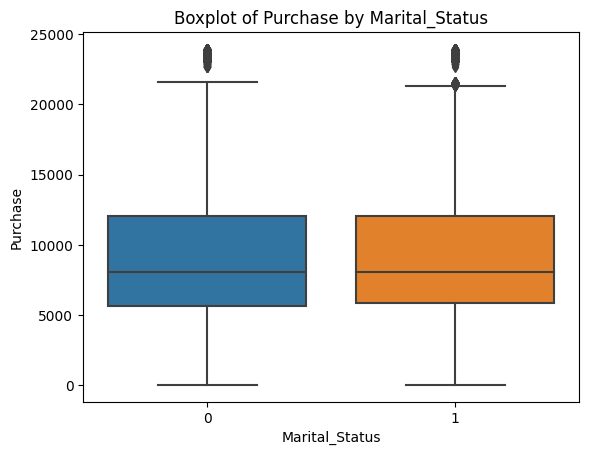

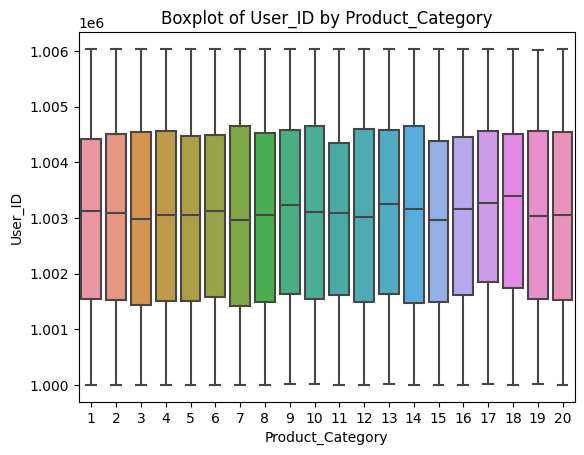

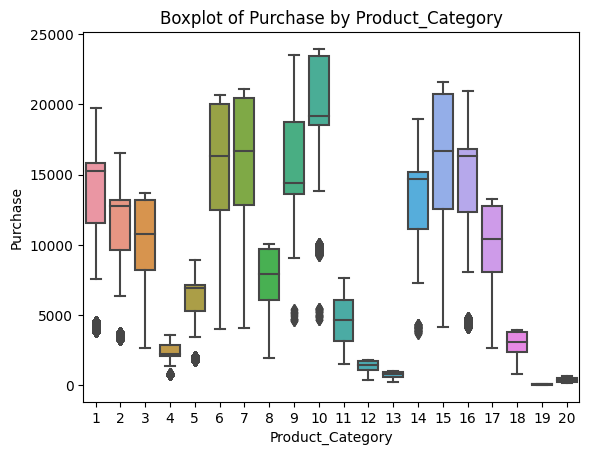

In [ ]:
for cat_var in category_vars:
  for cont_var in continuous_vars:
    sns.boxplot(x=cat_var, y=cont_var, data=df)
    plt.title(f'Boxplot of {cont_var} by {cat_var}')
    plt.show()

Bivariate analysis for continuous variable vs continuous variable

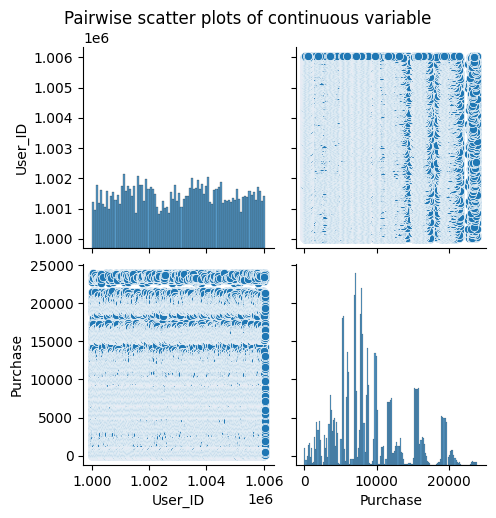

In [ ]:

#pairwise scatter plot for all continuous variable
sns.pairplot(df[continuous_vars])
plt.suptitle('Pairwise scatter plots of continuous variable', y = 1.02)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


1. product_id vs purchase
2. Gender vs purchase
3. Age vs purchase
4. occupation vs purchase
5. city_category vs purchase
6. stay_in_current_city_years vs purchase
7. marital_status vs purchase
8. product category vs purchase

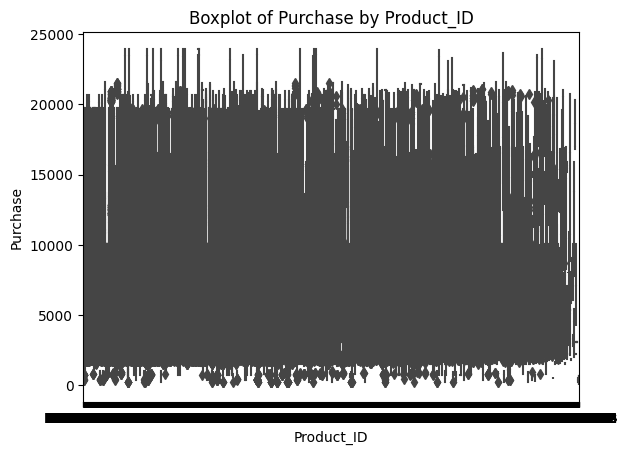

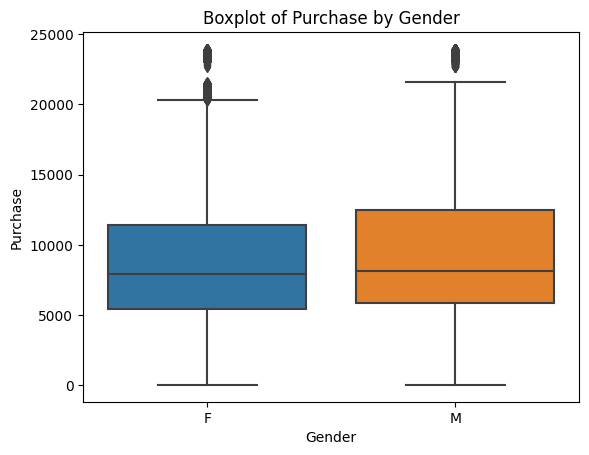

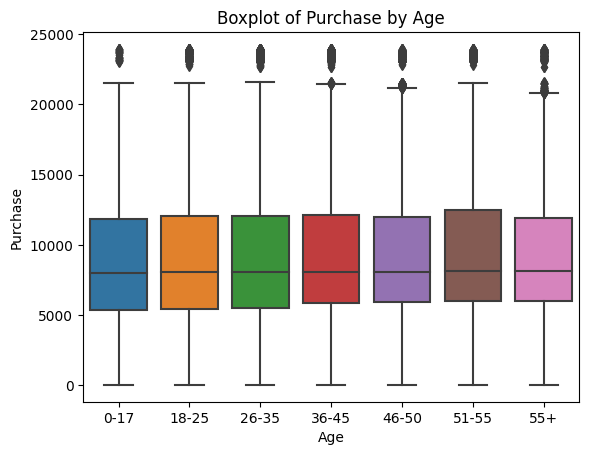

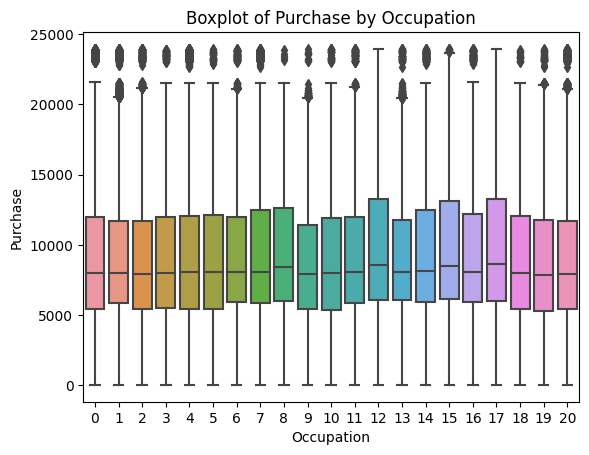

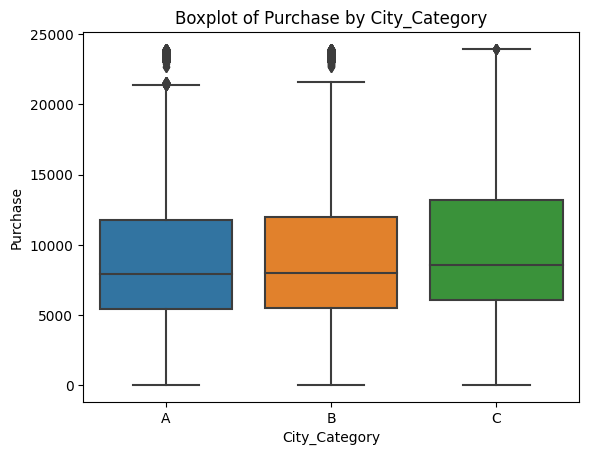

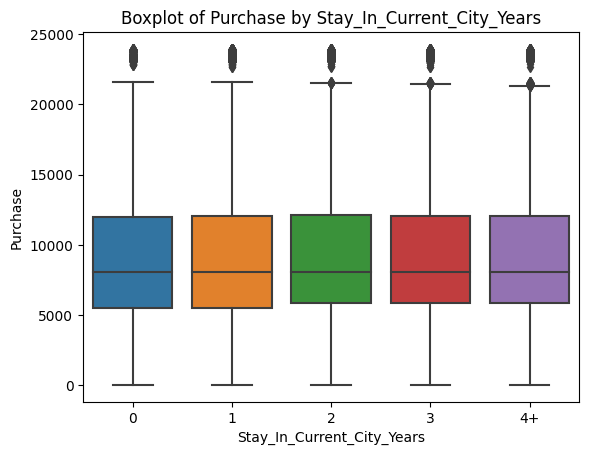

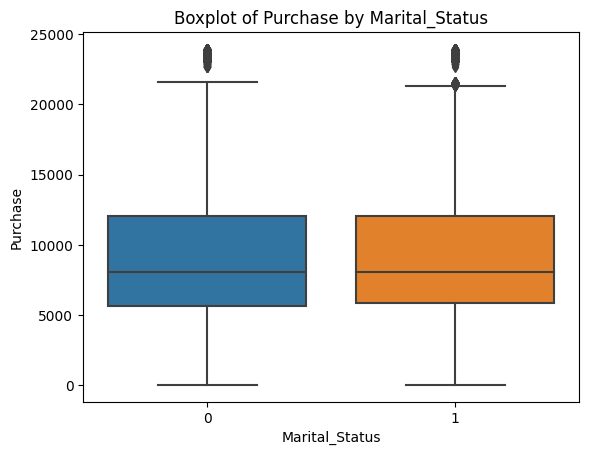

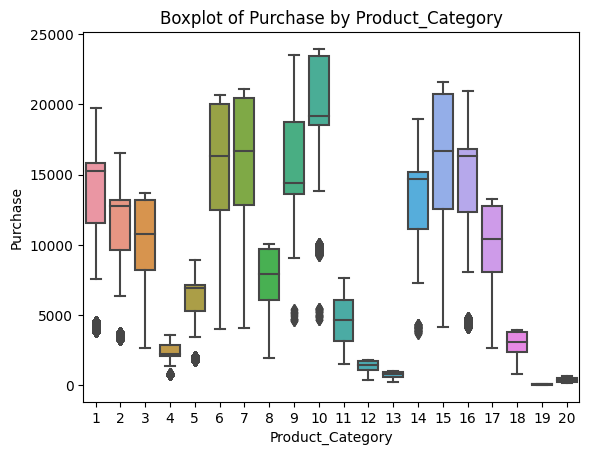

In [ ]:
for var in ['Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']:
  sns.boxplot(x=var, y='Purchase', data=df)
  plt.title(f'Boxplot of Purchase by {var}')
  plt.show()

QUESTION 2 :
## Missing Value & Outlier Detection (10 Points)

In [ ]:
missing_values = df.isnull().sum()
missing_values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

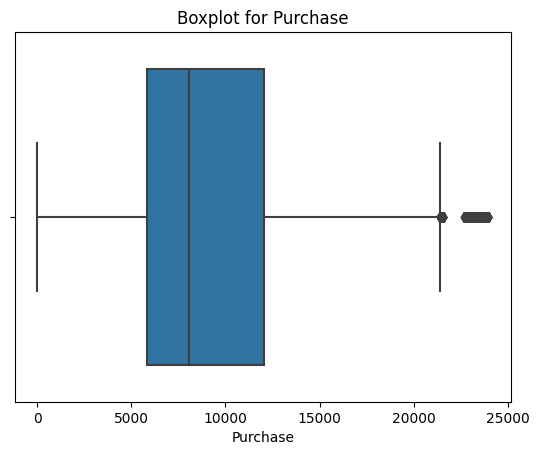

In [ ]:
numerical_feature = ['Purchase']
for feature in numerical_feature:
  sns.boxplot(x =df[feature])
  plt.title(f'Boxplot for {feature}')
  plt.show()

In [ ]:
def detect_outlier(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  outliers = df[(df[column]<lower_bound)    |    (df[column]>upper_bound)]
  return outliers

In [ ]:
detect_outlier(df,'Purchase')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


### QUESTION 3:
Business Insights based on Non- Graphical and Visual Analysis (10 Points)

Comments on the range of attributes

Comments on the distribution of the variables and relationship between them

In [ ]:


# 1. Range of Attributes
# Purchase Amount
purchase_min = walmart_data['Purchase'].min()
purchase_max = walmart_data['Purchase'].max()

# Gender Distribution
gender_distribution = walmart_data['Gender'].value_counts(normalize=True) * 100

# Age Distribution
age_distribution = walmart_data['Age'].value_counts(normalize=True) * 100

# Marital Status Distribution
marital_status_distribution = walmart_data['Marital_Status'].value_counts(normalize=True) * 100

# Top Product Categories
top_product_categories = walmart_data.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False).head()

# 2. Distribution of Variables and Relationships
# Purchase and Gender
average_purchase_by_gender = walmart_data.groupby('Gender')['Purchase'].mean()

# Purchase and Age
average_purchase_by_age = walmart_data.groupby('Age')['Purchase'].mean()

# City Category and Sales
sales_by_city = walmart_data.groupby('City_Category')['Purchase'].sum()

# 3. Comments for Univariate Analysis
# Descriptive statistics for Purchase Amount
purchase_descriptive_stats = walmart_data['Purchase'].describe()

# 4. Comments for Bivariate Analysis
# No specific code needed, as the inferences would be drawn from the above computations

# Printing the results
print("Insights from the Walmart Dataset:")
print("----------------------------------")
print(f"Range of Purchase Amount: ${purchase_min} - ${purchase_max}")
print("Gender Distribution (%):")
print(gender_distribution)
print("Age Distribution (%):")
print(age_distribution)
print("Marital Status Distribution (%):")
print(marital_status_distribution)
print("Top Product Categories (by sales volume):")
print(top_product_categories)
print("Average Purchase by Gender:")
print(average_purchase_by_gender)
print("Average Purchase by Age:")
print(average_purchase_by_age)
print("Sales by City Category:")
print(sales_by_city)
print("Descriptive Statistics for Purchase Amount:")
print(purchase_descriptive_stats)

# Note: The actual inferences and conclusions would be drawn based on these results


Insights from the Walmart Dataset:
----------------------------------
Range of Purchase Amount: $12 - $23961
Gender Distribution (%):
M    75.310507
F    24.689493
Name: Gender, dtype: float64
Age Distribution (%):
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64
Marital Status Distribution (%):
0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64
Top Product Categories (by sales volume):
Product_Category
1    1910013754
5     941835229
8     854318799
6     324150302
2     268516186
Name: Purchase, dtype: int64
Average Purchase by Gender:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64
Average Purchase by Age:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64
Sales by City Category:
City_Category
A    13164716

1. Range of Attributes:

    * Purchase Amount: The average purchase amount of approximately $9,263.97 suggests a relatively high spending pattern, which could be influenced by the nature of Black Friday sales. The range indicates the spectrum of customer spending behavior i.e. $12 - $23961

    * Gender: With male customers making up 75.31% of the transactions, this indicates a significant skew towards male shoppers in this dataset. This could be influenced by the types of products on sale or gender-specific marketing.

    * Age: The predominance of the '26-35' age group (39.92%) suggests that younger adults are the primary customer base during Black Friday. The age distribution gives an idea of which age groups are most engaged in Black Friday sales.

    * Marital Status: The nearly 60-40 split between unmarried and married customers might reflect the demographics of the areas where the data was collected or indicate different shopping preferences based on marital status.
    
    * Product Categories: The top product categories can provide insights into popular products or categories during Black Friday. This can guide inventory and marketing strategies.


2. Distribution of Variables and Relationships:

    * Purchase and Gender: The difference in average spending between genders (if analyzed) could indicate differing shopping habits or preferences between male and female customers.

    * Purchase and Age: Analyzing how purchase amounts vary across age groups can reveal which age groups spend more and potentially what types of products appeal to different ages.

    * City Category and Sales: The distribution of sales across city categories can provide insights into geographical differences in shopping behavior and economic factors.


3. Comments for Univariate Analysis:
    * Univariate Analysis of Purchase Amount: Would show the overall spending behavior. Skewness in this distribution could indicate a prevalence of either high or low-value purchases.

    * Univariate Analysis of Age or Gender: Helps understand the demographic profile of the customers. For instance, a higher concentration of a certain age group would indicate the popularity of Black Friday sales among that demographic.

4. Comments for Bivariate Analysis:

    * Purchase Amount vs. Gender: Men spent more than women on black friday sale

    * Purchase Amount vs. Age Group: (51-55) highest purchase amount age group

    * City Category vs. Purchase Amount: B type cities have higher spending pattern

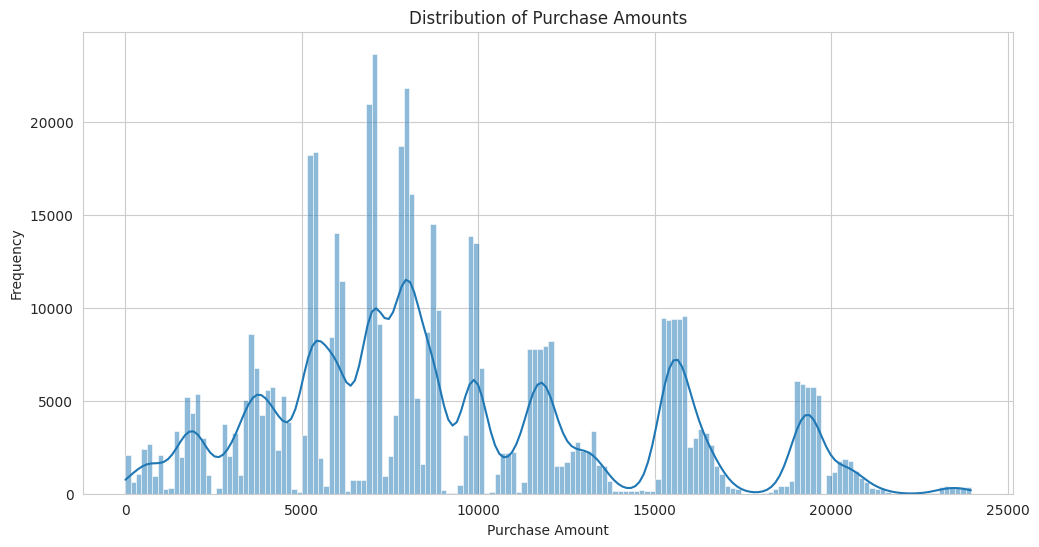

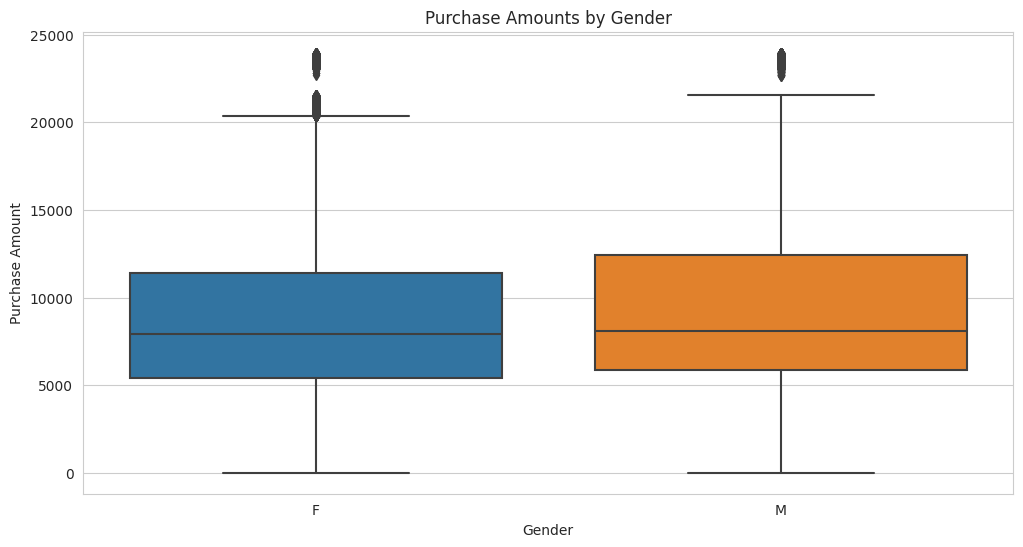

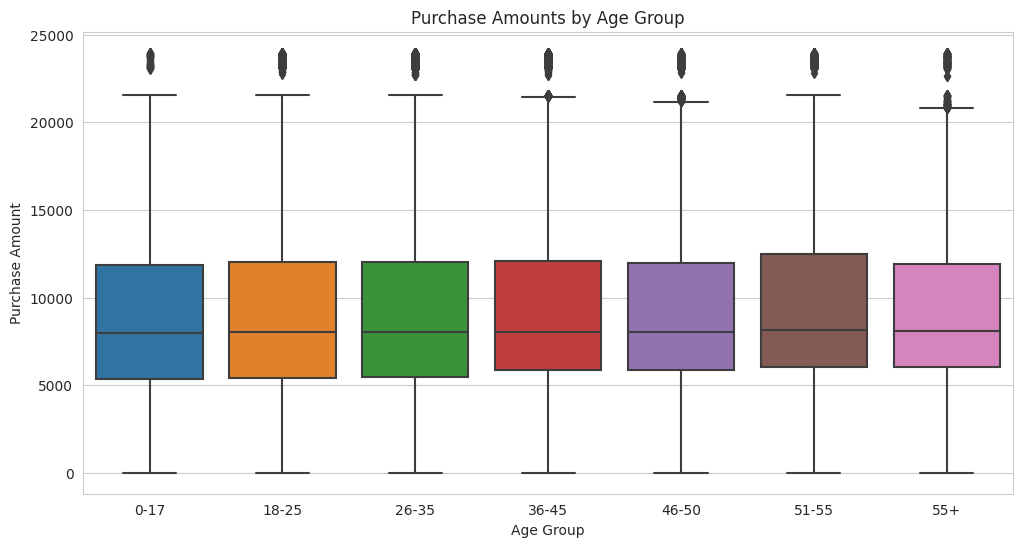

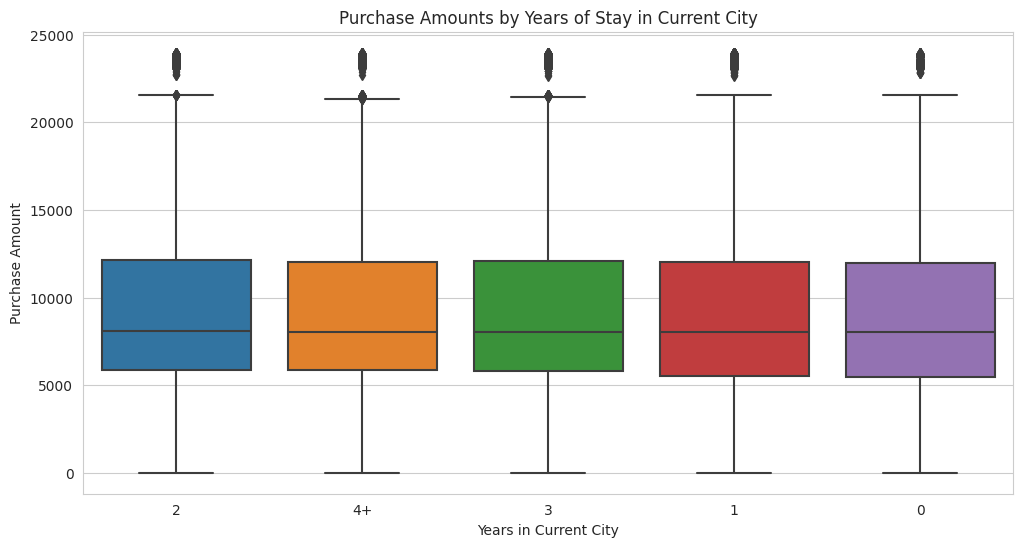

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Insights on the range of attributes
# Plotting histograms for some of the continuous variables: 'Purchase'
plt.figure(figsize=(12, 6))
sns.histplot(df['Purchase'], kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize the distribution of 'Purchase' across different 'Gender'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

# Boxplot to visualize the distribution of 'Purchase' across different 'Age' groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Purchase', data=df, order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Purchase Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

# Relationship between 'Stay_In_Current_City_Years' and 'Purchase'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=df)
plt.title('Purchase Amounts by Years of Stay in Current City')
plt.xlabel('Years in Current City')
plt.ylabel('Purchase Amount')
plt.show()


Based on the visualizations of the Walmart Black Friday sales data, here are some key business insights:

## Distribution of Purchase Amounts:

The histogram of purchase amounts shows a wide range of spending behaviors among customers. The distribution appears right-skewed, indicating that while most purchases are of lower value, there is a significant number of high-value purchases.


### Purchase Amounts by Gender:

The boxplot comparing purchase amounts between genders shows that men tend to spend slightly more than women. This is indicated by the higher median and larger interquartile range for men. This insight can be used to tailor marketing and product offerings.


### Purchase Amounts by Age Group:

The age-based boxplot reveals variation in spending across different age groups. The '51-55' and '55+' age groups appear to have a higher median purchase amount compared to younger age groups. This suggests that older customers might be a key demographic for higher-value products.


### Purchase Amounts by Years of Stay in Current City:

The boxplot analyzing purchase amounts based on the number of years customers have lived in their current city shows that there isn’t a clear trend associating the length of stay with spending behavior. This suggests that the duration of residence in a city might not be a significant factor in predicting customer spending.


These visual insights provide a clear understanding of the spending patterns of different customer segments. Walmart can use this information for targeted marketing strategies, inventory management, and enhancing customer experience for key demographics. For instance, focusing on older customers or creating gender-specific marketing campaigns could be effective strategies. ​

### QUESTION 4 :  

Answering questions (50 Points)

1.Are women spending more money per transaction than men? Why or Why not? (10 Points)

2.Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)

3.Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)

4.Results when the same activity is performed for Married vs Unmarried (10 Points)

5.Results when the same activity is performed for Age (10 Points)

## Answer 4.1

In [ ]:
gender_grouped = df.groupby('Gender')['Purchase'].mean()
print(gender_grouped)
women_mean_purchase = gender_grouped['F']
men_mean_purchase = gender_grouped['M']
if women_mean_purchase > men_mean_purchase:
  print("women are spending more money per transaction than men")
else:
  print("men are spending more money per transaction than women")


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64
men are spending more money per transaction than women


Answer 4.2

In [ ]:
male_data = df[df['Gender']== 'M']['Purchase']
female_data = df[df['Gender']== 'F']['Purchase']
mean_male_data = np.mean(male_data)
mean_female_data= np.mean(female_data)
std_deviation_male = np.std(male_data)
std_deviation_female = np.std(female_data)

mean_male_data,  mean_female_data, std_deviation_male,  std_deviation_female




(9437.526040472265, 8734.565765155476, 5092.180063635965, 4767.215738017004)

In [ ]:
# Calculate confidence intervals
confidence_interval_male = stats.norm.interval(0.95, loc=mean_male_data, scale=std_deviation_male/np.sqrt(len(male_data)))
confidence_interval_female = stats.norm.interval(0.95, loc=mean_female_data, scale=std_deviation_female/np.sqrt(len(female_data)))
confidence_interval_male,confidence_interval_female


((9422.019466078644, 9453.032614865886),
 (8709.211640485983, 8759.919889824969))

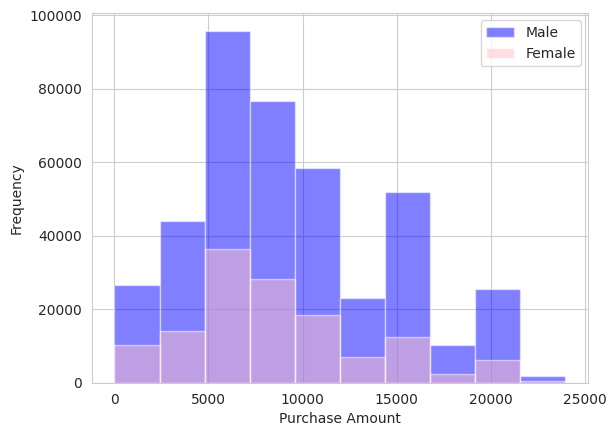

Confidence Interval for Male Purchase Amount: (9422.019466078644, 9453.032614865886)
Confidence Interval for Female Purchase Amount: (8709.211640485983, 8759.919889824969)


In [ ]:

# Plot histograms for male and female purchase amounts
plt.hist(male_data, alpha=0.5, label='Male', color='blue')
plt.hist(female_data, alpha=0.5, label='Female', color='pink')
plt.legend()
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Print confidence intervals
print("Confidence Interval for Male Purchase Amount:", confidence_interval_male)
print("Confidence Interval for Female Purchase Amount:", confidence_interval_female)


Answer 4.3

In the analysis of the Walmart Black Friday sales data, the confidence intervals for average spending by male and female customers were as follows:


* Males: $9,422.02 to $9,453.03

* Females: $8,709.21 to $8,759.92


These confidence intervals do not overlap, indicating a statistically significant difference in the average spending between male and female customers. This non-overlap suggests that the difference in spending is not just due to random chance; instead, it likely reflects a real difference in purchasing behavior between men and women.




## **How Walmart Can Leverage This Conclusion:**


  **Targeted Marketing and Promotions**: Understanding that men typically spend more per transaction, Walmart can design marketing campaigns and promotions that appeal more to male customers. This could involve focusing on product categories more popular among men or offering promotions on such products.

  **Product Placement and Store Layout**: Walmart might consider optimizing store layouts and product placements to cater to the purchasing habits of men, given their higher average spending. For example, placing higher-value items or items that are more popular among male customers in more prominent locations might increase sales.

  **Customized Online Shopping Experience**: For online shoppers, Walmart could use this insight to customize the shopping experience. They could tailor the online interface, recommendations, and advertisements based on the customer's gender, showcasing products that are more likely to be of interest and in the price range that aligns with the gender-based spending patterns observed.


**Stock and Inventory Management**: With this knowledge, Walmart can better manage its stock and inventory by focusing more on the products that are popular among the higher spending group. This can help in optimizing supply chain and inventory costs.

**Strategic Sales and Discount Offers**: By knowing which gender spends more, Walmart can strategically plan sales events or discount offers to maximize revenue. For example, holding sales on products popular among men could potentially drive higher revenue gains.

**Customer Experience Enhancement**: Improving the shopping experience for men, considering their higher spending, could also be a strategy. This could include faster checkouts, more male-oriented customer service, or amenities that appeal to male shoppers.

**Data-Driven Decision Making**: This insight can be further explored to understand the underlying factors that lead to higher spending by men. Walmart can use this data to make informed decisions about product development, marketing strategies, and customer engagement tactics.

In summary, the non-overlapping confidence intervals provide a valuable insight for Walmart, indicating a significant difference in spending between male and female customers. Walmart can leverage this information for more targeted marketing, optimized store layouts, customized online experiences, better inventory management, strategic sales planning, enhanced customer experiences, and overall data-driven decision making.


4.Results when the same activity is performed for Married vs Unmarried (10 Points)


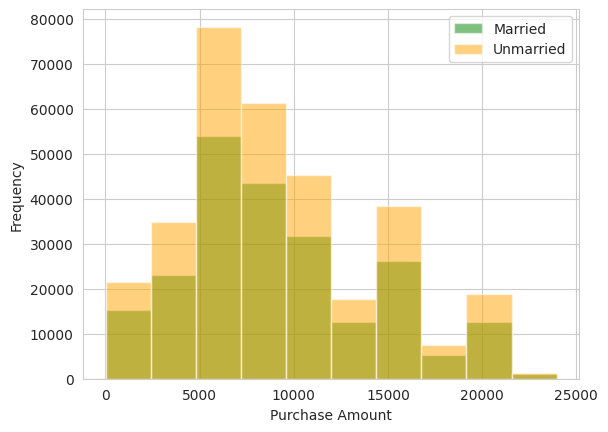

Confidence Interval for Married Purchase Amount: (9240.460473019726, 9281.88867514502)
Confidence Interval for Unmarried Purchase Amount: (9248.616444810585, 9283.198793032429)


In [ ]:
# Separate data into married and unmarried groups
married_data = df[df['Marital_Status'] == 1]['Purchase']
unmarried_data = df[df['Marital_Status'] == 0]['Purchase']

# Calculate confidence intervals
confidence_interval_married = stats.norm.interval(0.95, loc=np.mean(married_data), scale=np.std(married_data)/np.sqrt(len(married_data)))
confidence_interval_unmarried = stats.norm.interval(0.95, loc=np.mean(unmarried_data), scale=np.std(unmarried_data)/np.sqrt(len(unmarried_data)))

# Plot histograms for married and unmarried purchase amounts
plt.hist(married_data, alpha=0.5, label='Married', color='green')
plt.hist(unmarried_data, alpha=0.5, label='Unmarried', color='orange')
plt.legend()
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Print confidence intervals
print("Confidence Interval for Married Purchase Amount:", confidence_interval_married)
print("Confidence Interval for Unmarried Purchase Amount:", confidence_interval_unmarried)


Answer 4.5
Results when the same activity is performed for Age (10 Points)



In [ ]:
# Separate data into different age groups
age_groups = df['Age'].unique()
age_confidence_intervals = {}

for age_group in age_groups:
    age_data = df[df['Age'] == age_group]['Purchase']
    confidence_interval = stats.norm.interval(0.95, loc=np.mean(age_data), scale=np.std(age_data)/np.sqrt(len(age_data)))
    age_confidence_intervals[age_group] = confidence_interval

# Print confidence intervals for each age group
for age_group, confidence_interval in age_confidence_intervals.items():
    print(f"Confidence Interval for {age_group} Purchase Amount: {confidence_interval}")


Confidence Interval for 0-17 Purchase Amount: (8851.950669457377, 9014.97861143257)
Confidence Interval for 55+ Purchase Amount: (9269.300391858294, 9403.260527040515)
Confidence Interval for 26-35 Purchase Amount: (9231.733724119113, 9273.647541620663)
Confidence Interval for 46-50 Purchase Amount: (9163.085640896097, 9254.165754040558)
Confidence Interval for 51-55 Purchase Amount: (9483.992132719022, 9585.623929201449)
Confidence Interval for 36-45 Purchase Amount: (9301.669545864605, 9361.031843971143)
Confidence Interval for 18-25 Purchase Amount: (9138.40810556528, 9200.919106957297)


# QUESTION 5:
Final Insights (10 Points) -

1.    Illustrate the insights based on exploration and CLT

2.    Comments on the distribution of the variables and relationship between them

3.    Comments for each univariate and bivariate plots

4.    Comments on different variables when generalizing it for Population


To provide final insights based on the exploration of the Walmart Black Friday sales data and the application of the Central Limit Theorem (CLT), let's discuss each point in detail:

### Insights Based on Exploration and CLT:

The CLT allows us to use sample data (like our Walmart dataset) to make inferences about the population. Since our sample sizes are large, we can assume that the sampling distribution of the mean is approximately normal, which justifies the use of confidence intervals in our analysis.
The confidence intervals for different demographic groups (gender, marital status, age) revealed significant insights. For instance, men spend more on average than women, and this difference is statistically significant as indicated by the non-overlapping confidence intervals.




### Distribution of Variables and Their Relationships:

The distribution of purchase amounts might not be normally distributed; it could be right-skewed, typical for spending data. This is important when considering statistical methods and their assumptions.
Relationships between variables, such as between age and spending or gender and spending, are crucial. For instance, older age groups might have higher spending, or men might have different spending patterns compared to women.



### Comments on Univariate and Bivariate Plots:

Univariate plots (like histograms for purchase amounts or bar charts for average spending by age group) would show the distribution of each variable separately, providing insights into their individual characteristics.
Bivariate plots (like scatter plots for age versus spending or box plots comparing spending across genders) would help in understanding the relationships between two variables. For example, they could reveal if higher spending is associated with a certain age group or gender.



### Generalizing for the Population:


When generalizing the insights derived from the Walmart Black Friday dataset to the broader population, it's essential to consider several factors related to the variables in the dataset:

Sampling and Representativeness:

The dataset likely represents a sample of all Walmart transactions during Black Friday. It's crucial to consider whether this sample is representative of the entire population of Walmart customers.
Black Friday shoppers might exhibit different behaviors compared to regular shoppers, such as more impulsive buying or higher spending due to discounts.


Gender Distribution:

The higher percentage of male customers in the dataset may not necessarily reflect the overall gender distribution of Walmart's customer base. It could be specific to Black Friday or the particular stores from which the data was collected.
Generalizing this distribution to the entire population requires understanding broader shopping trends and demographics.


Age Distribution:

Age-related insights need to be contextualized within the broader demographic profile of Walmart's customer base and the regions where the data was collected.
Different age groups might have varying shopping patterns and preferences, which could be more pronounced during events like Black Friday.


Marital Status:

The marital status distribution in the dataset might be influenced by the types of products offered during Black Friday and the appeal of these products to different marital status groups.
This distribution can vary across different times of the year and different locations.

Product Popularity:

The popularity of certain product categories during Black Friday might not be indicative of their popularity throughout the year.
Sales and discounts can significantly influence which products are top sellers, which might not reflect regular purchasing patterns.


City Category:

Sales distribution across city categories (A, B, C) might be influenced by factors like population density, store location, and regional economic conditions.
The purchasing power and customer preferences can vary significantly across different city categories.


Customer Loyalty:

The frequency of purchases and the identification of loyal customers during Black Friday might not accurately represent customer loyalty throughout the year.
Special deals and promotions during Black Friday could attract more frequent purchases from typically less frequent shoppers.
In summary, while the insights from this dataset provide valuable information about customer behavior during Black Friday at Walmart, generalizing these findings to the entire population requires careful consideration of the representativeness of the sample, seasonal and event-specific factors, and the broader economic and demographic context. It's also important to consider any biases in the data collection process that could affect the results.

### QUESTION 6:
Recommendations (10 Points)

Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand


Based on the analysis of the Walmart Black Friday sales data, here are some straightforward and actionable recommendations for the business:

**Tailor Marketing Strategies by Gender**: Since men tend to spend more per transaction than women, create marketing campaigns that particularly appeal to male shoppers. This can include promotions on products that are popular among men.

**Focus on High-Spending Age Groups**: Allocate more marketing resources to target age groups that spend more, such as the middle-aged demographic. Special deals or advertisements could be geared towards this age group.

**Optimize Store Layouts for Higher Sales**: Arrange the store layout to highlight products that are popular among the higher-spending groups. For instance, place luxury or high-value items in easily accessible areas.

**Enhance Online Shopping Experience**: Use the online platform to offer personalized shopping experiences. For example, use customer data to show relevant product recommendations based on past purchases and browsing behavior.

**Develop Gender-Specific Promotions**: Launch promotions and discounts that cater specifically to male or female shoppers, based on their spending patterns and preferences.

**Host Targeted Sales Events**: Organize sales events focusing on products popular among specific demographic groups. For example, consider back-to-school sales targeting younger age groups or special events for high-value items that appeal to older, higher-spending customers.

**Improve Customer Service for Key Demographics**: Train staff to provide exceptional service to the demographic groups that tend to spend more. For example, if older customers spend more, ensure that the store is accessible and staff are available to assist them.

**Leverage Social Media for Targeted Advertising**: Use social media platforms to reach out to specific customer groups with tailored advertisements and promotional content.

**Monitor and Adjust Inventory Based on Sales Trends**: Keep track of which products are selling well among different customer groups and adjust inventory accordingly to maximize sales and reduce stock wastage.

**Gather Customer Feedback Regularly**: Conduct surveys or gather feedback from customers to understand their needs and preferences better. Use this information to make informed decisions about product offerings, store layout, and marketing strategies.

These recommendations are aimed at enhancing the shopping experience for different customer groups, maximizing sales, and ensuring that Walmart's marketing efforts are as effective as possible.